# Background: Diodes

:::{admonition} Goals
:class: tip
-  Understand the concept of load lines and its usage to solve linear and nonlinear circuits.

-  IV (current vs. voltage) curve of diodes

-  Simple diode circuits


:::

## Pacotes e funções

In [5]:
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
import matplotlib.ticker as plticker
import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
import os
from scipy import optimize
import SchemDraw as schem
import SchemDraw.elements as e
# interactive cells
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import optimize

In [2]:
def DivTensao(Z1, Z2, fonte = [True,e.SOURCE_V], unit_size = 2.5, **kwargs):
    d = schem.Drawing(unit=unit_size, **kwargs)
    if fonte[0]:
        #fonte
        gnd1 = d.add(e.GND)
        d.add(fonte[1], label='$V_{Th}$')
        d.add(e.RES, d='right', label='$R_g$')
    #divisor de tensão
    vin = d.add(e.DOT_OPEN ,label='$V_{in}$')
    z1 = d.add(Z1[0], d='right',label='${}$'.format(Z1[1]))
    z2 = d.add(Z2[0], d='down',botlabel='${}$'.format(Z2[1]))
    gnd2 = d.add(e.GND)
    #output
    d.add(e.LINE, d='right', xy=z1.end, l=1)
    vout = d.add(e.DOT_OPEN, label='$V_{out}$')
    #loop
    d.labelI(z2, '$I$',top=False, arrowofst = 0.8, arrowlen = 0.75)
    return d

## Resolvendo a lei de Kirchhoff (KVL) graficamente

Quando escreve-se a KVL para componentes cuja relação entre tensão e corrente é linear, geralmente é trivial resolver a lei de Kirchhoff. Por exemplo, considere o circuito abaixo:

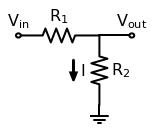

In [4]:
DivTensao([e.RES,'R_1'],[e.RES,'R_2'],fonte = [False,e.SOURCE_V]).draw()

KVL results in 

$$ V_{in} -R_1 I-R_2 I = 0, $$ 

i.e.,

$$ I = \frac {V_{in}} {R_1 + R_2}. $$

Assume for a moment that you don't know how to write Ohm's law for the resistor $ R_2 $, let the voltage on this resistor be set to $ V_ {out} (I) $. The KVL in this case could be written in the form: 

$$V_{in} -R_1 I = V_ {out} (I). $$

We have two functions of the chain, one on the left side (LHS) and the other on the right side (RHS). If we  plot both on a $ I \times V $ chart result in the following,

In [3]:
@interact(Vin=(-5,5),R1=(1,300),R2=(1,300))
def plot_load_lines(Vin=5,R1=100,R2=100):
    #limites dos eixos
    Vin_min, Vin_max = -6,6 # [V]
    I_min, I_max = -60,60 # [mA]
    #-------------
    I=np.linspace(I_min,I_max,100)
    #----------------------
    Vlhs = Vin-R1*I # equação LHS
    Vrhs = R2*I # equação RHS
    #---
    fig_size = (10,5)
    fig,ax = plt.subplots(1,2,figsize=fig_size)
    #------------------
    ax0 = ax[0]
    DivTensao([e.RES,'R_1'],[e.RES,'R_2'],fonte = [False,e.SOURCE_V]).draw(ax=ax0)
    ax0.axes.get_xaxis().set_visible(False)
    ax0.axes.get_yaxis().set_visible(False)
    ax0.set_frame_on(False)
    ax0.set_xticklabels(())
    ax0.set_yticklabels(())
    ax0.get_figure().set_size_inches(fig_size[0],fig_size[1])
    #------------------
    ax0 = ax[1]
    ax0.plot(Vlhs,I*1e3, label = r'$V_{in}-R_1I-V(I)=0$')
    ax0.plot(Vrhs,I*1e3, label = r'$V(I)-R_2I=0$')
    #---
    #eixos x-y
    ax0.axhline(0, color='k', linestyle = '-',lw=2)
    ax0.axvline(0, color='k', linestyle = '-',lw=2)
    #---
    lab = '$V_{aberto}$'+'={} V'.format(Vin)
    ax0.scatter(Vin,0, color='b', marker='o', s=70, label=lab,zorder=3)
    lab = '$I_{curto}$'+'={:2.1f} mA'.format(1e3*Vin/R1)
    ax0.scatter(0,Vin/R1*1e3, color='b', marker='P', s=70, label=lab,zorder=3)
    #solução para corrente e tensão
    ax0.axhline(1e3*Vin/(R1+R2), c='k', ls = '--')
    ax0.axvline(Vin*R2/(R1+R2), c='k', ls = '--')
    lab = 'I,V={:2.1f} mA, {:2.1f} V'.format(1e3*Vin/(R1+R2),Vin*R2/(R1+R2))
    ax0.scatter(Vin*R2/(R1+R2),1e3*Vin/(R1+R2), c='r', marker='o', s=100, label=lab)
    #-----------------------
    ax0.set_xlabel('Tensão (V)')
    ax0.set_ylabel('Corrente (mA)')
    ax0.set_xlim([Vin_min,Vin_max])
    ax0.set_ylim([I_min,I_max])
    ax0.legend(loc = 'center left',bbox_to_anchor=[1.0,0.5])
    ax0.grid(True,which='both')
    ax0.xaxis.set_major_locator(plticker.MultipleLocator(1))
    ax0.yaxis.set_major_locator(plticker.MultipleLocator(10)) 
    #plt.tight_layout()

interactive(children=(IntSlider(value=5, description='Vin', max=5, min=-5), IntSlider(value=100, description='…

Naturalmente, o ponto de interseção das duas curvas fornece a corrente elétrica no circuito: 

$$I=\frac{V_{in}}{R_1+R_2},$$

assim como a tensão no resistor $R_2$: $V_{out}=\frac{R_2}{R_1+R_2}$. Este par ordenado é mostrado na figura acima.

### Curvas de carga
A estratégia usada acima, de traçar as curvas de $I\times V$ da parte Ohmica e encontrar a sua interseção com o componente desconhecido (aqui no caso o resistor $R_2$) é conhecido como método das curvas de carga.
Sabendo traçar estas curvas, podemos avaliar a corrente e tensão que teremos no componente desejado ($R_2$) como função dos demais parâmetros do circuito. 
Duas variáveis são comuns aqui:
* a tensão de entrada $V_{in}$;
* a resistência $R_1$.
Nos trechos de código abaixo são geradas curvas quando cada um destes parâmetros é variado independetemente:

#### Variando a tensão de entrada $V_{in}$

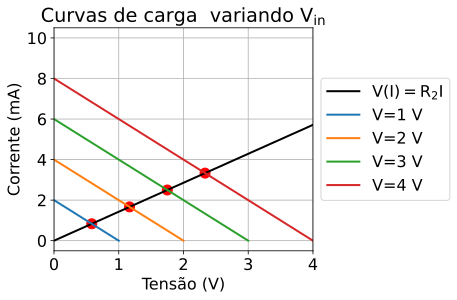

In [49]:
fig,ax = plt.subplots(figsize=(4,4))
#Valores numéricos
R1 = 500 # resistencia R1
R2 = 700 # resistencia R2
VinMin, VinMax = 1, 5 #limites do parâmetro de varredura
#---
I=np.linspace(0,VinMax/(R1),100)
Vrhs = R2*I # equação RHS
plt.plot(Vrhs,I*1e3, 'k', label = '$V(I)=R_2I$')
for Vin in range(VinMin,VinMax,1):
    #----------------------
    Vlhs = Vin-R1*I # equação LHS
    #---
    plt.plot(Vlhs,I*1e3, label = '$V$={} V'.format(Vin))
    plt.scatter(Vin*R2/(R1+R2),1e3*Vin/(R1+R2), color='r', marker='o', s=100)
#-----------------------
plt.title('Curvas de carga  variando $V_{in}$')
plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (mA)')
plt.xlim([0,Vin])
plt.legend(loc = 'center left',bbox_to_anchor=[1.0,0.5])
plt.grid(True)
plt.savefig('curva_carga_divisor_tensao_variando_Vin.pdf',bbox_inches='tight')

#### Variando a resistência  $R_{1}$

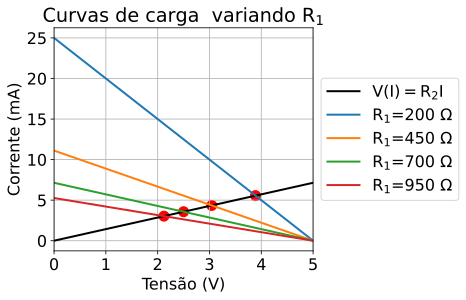

In [32]:
fig,ax = plt.subplots(figsize=(4,4)) #inicializa figura
#---
#Valores numéricos
Vin = 5 # tensão da fonte
R2 = 700 # resistencia R2
R1min, R1max= 200, 1000 #limites do parâmetro de varredura
I=np.linspace(0,Vin/(R1min),100) # vetor de corrente
#---
Vrhs = R2*I # equação RHS
plt.plot(Vrhs,I*1e3, 'k', label = '$V(I)=R_2I$')
#---
for R1 in range(R1min,R1max,250):
    Vlhs = Vin-R1*I # equação LHS
    #---
    plt.plot(Vlhs,I*1e3, label = '$R_1$={} $\Omega$'.format(R1))
    plt.scatter(Vin*R2/(R1+R2),1e3*Vin/(R1+R2), color='r', marker='o', s=100)
#-----------------------
plt.title('Curvas de carga  variando $R_1$')
plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (mA)')
plt.xlim([0,Vin])
plt.legend(loc = 'center left',bbox_to_anchor=[1.0,0.5])
plt.grid(True)
plt.savefig('curva_carga_divisor_tensao_variando_R1.pdf',bbox_inches='tight')

## Circuitos com diodos
Considere agora um circuito contendo um elemento cuja relação entre tensão e corrente é não-linear, por exempleo, um diodo. O caso do diodo fornece uma aplicação importante do método das curvas de carga discutido acima.
Quando se ignora efeitos de ruptura (breakdown),a corrente no diodo depende da tensão entre seus terminais da seguinte forma:

$$I(V)=I_S (\exp\left(\frac{q V}{k_B T}\right)-1).$$

Sendo que,
* $I_S$ [A] é a tensão de saturação reversa (depende da temperatura);
* $k_B\approx1.38\times10^{-23} $ [J/K] é constante de Boltzmann;
* $T $ [K] é a temperatura da junção PN;
* $q\approx1.6\times 10^{-19} $ [C] é a carga do elétron.

Note que $q/(k_B T)\approx39.6\equiv \beta $ [C/J] para $T=293$ [K], portanto $I(V)=I_S (\exp(\beta V)-1).$

In [1]:
1/39

0.02564102564102564

In [8]:
#Pacotes para lidar com unidades
from astropy import units as un
from astropy import constants as cte
#---
(cte.e.si/(cte.k_B*293*un.Kelvin))


<Quantity 39.6058639 C / J>

Atribuindo valores para $I_S$ o comportamento da curva $I\times V$ para o diodo poder ser graficado:
* $I_S^\text{(Ge)}\approx 10^{-8} A$
* $I_S^\text{(Si)}\approx 10^{-13} A$
* $I_S^\text{(GaAs)}\approx 7\times 10^{-21} A$

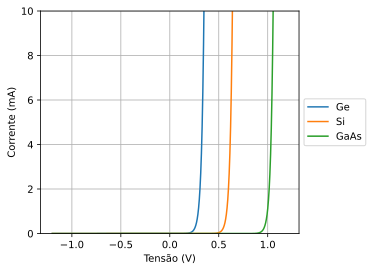

In [5]:
V=np.linspace(-1.2,1.2,1000) # vetor com tensões
#----------------------
β=39.6
Is_dict = {'Ge':1e-8,'Si':1e-13,'GaAs':7e-21} # dicionario contendo nome dos materias e valores de Is
fig,ax = plt.subplots(figsize=(4,4))
for material in Is_dict.keys():
    Id = Is_dict[material]*(np.exp(β*V)-1) # corrente no diodo
    #---
    plt.plot(V,Id*1e3, label = material)
    
#-----------------------
plt.ylim([0,10])
plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (mA)')

plt.legend(loc = 'center left',bbox_to_anchor=[1.0,0.5])
plt.grid(True)
plt.savefig('curva_IV_materiais.pdf',bbox_inches='tight')

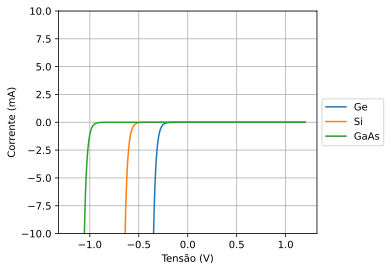

In [10]:
V=np.linspace(-1.2,1.2,1000) # vetor com tensões
#----------------------
β=39.6
Is_dict = {'Ge':1e-8,'Si':1e-13,'GaAs':7e-21} # dicionario contendo nome dos materias e valores de Is
fig,ax = plt.subplots(figsize=(4,4))
for material in Is_dict.keys():
    Id = -Is_dict[material]*(np.exp(β*(-V))-1) # corrente no diodo
    #---
    plt.plot(V,Id*1e3, label = material)
    
#-----------------------
plt.ylim([-10,10])
plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (mA)')

plt.legend(loc = 'center left',bbox_to_anchor=[1.0,0.5])
plt.grid(True)
plt.savefig('curva_IV_materiais.pdf',bbox_inches='tight')

Naturalmente o comportamento da corrente não é linear com a tensão. Considere o circuito abaixo:

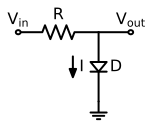

In [55]:
d=DivTensao([e.RES,'R'],[e.DIODE,'D'],fonte = [False,e.SOURCE_V])
d.draw()
d.save('divisor_diodo_vdiodo.pdf')

Para tentar resolvê-lo algebricamente, basta escrever a KVL,

$$V_{in}-R I- V_D(I)=0.$$

Substituindo a equação do diodo $V_D=\frac{1}{\beta}\ln(1+\frac{I}{I_S})$, a equação resultante que será necessário resolver é

$$V_{in}-R I- \frac{1}{\beta}\ln\left(1+\frac{I}{I_S}\right)=0.$$

O problema é que a equação acima é transcendental e não admite soluções algébricas.

<span style="color:red">É neste ponto que o método das linhas de carga se torna poderoso, pois nos permite avaliar o comportamento do circuito mesmo sem resolver explicitamente a equação decorrente da KVL</span>.

*Nota: Para valores de corrente bem pequenos (tais que $I\gg I_S$), é possível aproximar a KVL acima e utilizar uma função especial (Função $W$ de Lambert) para resolver alguns casos da KVL. Contudo, a própria função $W$ não pode ser expressada como combinação de funções elementares métodos numéricos para ser calculada.* 

A seguir vamos aplicar o método das curvas de carga ao circuito acima:

In [6]:
def Idiodo(V,Is=1e-13):
    β = 39.6 #[1/V]
    return Is*np.exp(β*V-1)
def Vdiodo(I,Is=1e-13):
    β = 39.6 #[1/V]
    return 1/β*np.log(1+I/Is)
# def KVL(I):
#     Vlhs = Vin-R*I
#     Vrhs = Vdiodo(I)
#     return Vlhs-Vrhs
def KVL(V,Vin,R):
    return Vin-R*Idiodo(V)-V
def Vdiodo(Vin,V0,R):
    return optimize.brentq(KVL, -1.1*V0, 1.1*V0, args = (Vin,R))
    #return fixed_point(lambda x: Vin-R*Idiodo(x)-x,0.6,args=(1.0,100))

In [12]:

#res = fixed_point(KVL,0.6,args=(1.0,100)).item()

In [8]:
@interact(Vin=(1e-3,1.5,0.01),R=(1,300))
def plot_load_lines_diodo(Vin=1,R=100):
    #limites dos eixos
    Vin_min, Vin_max = -0.5,1 # [V]
    I_min, I_max = -10,10 # [mA]
    #-------------
    V = np.linspace(-2,2,1000)
    #I = Idiodo(V)  # equação diodo
    I=np.linspace(I_min,I_max,1000)
    #----------------------
    Vlhs = Vin-R*I # equação LHS
    #Vlhs = Vin-R*Id # equação LHS
    #Vrhs = Vdiodo(Vin,Vin,R) # equação RHS
    
    #---
    fig_size = (10,5)
    fig,ax = plt.subplots(1,2,figsize=fig_size)
    #------------------
    ax0 = ax[0]
    DivTensao([e.RES,'R'],[e.DIODE,'D'],fonte = [False,e.SOURCE_V]).draw(ax=ax0)
    ax0.axes.get_xaxis().set_visible(False)
    ax0.axes.get_yaxis().set_visible(False)
    ax0.set_frame_on(False)
    ax0.set_xticklabels(())
    ax0.set_yticklabels(())
    ax0.get_figure().set_size_inches(fig_size[0],fig_size[1])
    #------------------
    ax0 = ax[1]
    ax0.plot(Vlhs,I*1e3, label = r'$V_{in}-R_1I-V(I)=0$')
    ax0.plot(V, Idiodo(V)*1e3, label = r'$V(I)-R_2I=0$',zorder=4)
    #---
    #eixos x-y
    ax0.axhline(0, color='k', linestyle = '-',lw=2)
    ax0.axvline(0, color='k', linestyle = '-',lw=2)
    #---
    lab = '$V_{aberto}$'+'={} V'.format(Vin)
    ax0.scatter(Vin,0, color='b', marker='o', s=70, label=lab,zorder=3)
    lab = '$I_{curto}$'+'={:2.1f} mA'.format(1e3*Vin/R)
    ax0.scatter(0,Vin/R*1e3, color='b', marker='P', s=70, label=lab,zorder=3)
    #solução para corrente e tensão
    Vd = Vdiodo(Vin,Vin,R) # equação RHS
    Id = Idiodo(Vd)
    ax0.axhline(1e3*Id, c='k', ls = '--',zorder=0)
    ax0.axvline(Vd, c='k', ls = '--',zorder=0)
    lab = 'I,V={:2.0f} μA, {:2.0f} mV'.format(1e6*Id,1e3*Vd)
    ax0.scatter(Vd,1e3*Id, c='r', marker='o', s=100, label=lab)
    #-----------------------
    ax0.set_xlabel('Tensão (V)')
    ax0.set_ylabel('Corrente (mA)')
    ax0.set_xlim([Vin_min,Vin_max])
    ax0.set_ylim([I_min,I_max])
    ax0.legend(loc = 'center left',bbox_to_anchor=[1.0,0.5])
    ax0.grid(True,which='both')
    ax0.xaxis.set_major_locator(plticker.MultipleLocator(0.2))
    ax0.yaxis.set_major_locator(plticker.MultipleLocator(2)) 
    #plt.tight_layout()

interactive(children=(FloatSlider(value=1.0, description='Vin', max=1.5, min=0.001, step=0.01), IntSlider(valu…

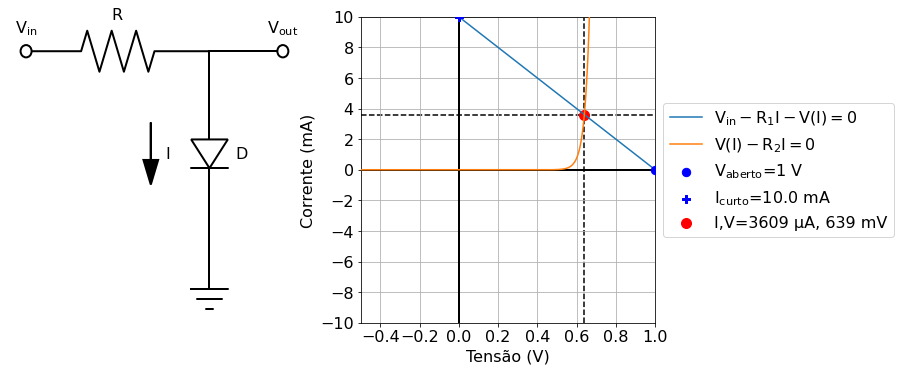

In [9]:
plot_load_lines_diodo(Vin=1,R=100)